# Part 1
## 1.資料清理與視覺化圖表
### 清理遺漏值:

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
#偵測遺漏值
df = pd.read_csv('HW1_house_data.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
def outlier_idx(x):
   
    q1,q3 = np.percentile(x , [25,75])
    IQR = q3 -q1;
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where( (x<lower_bound) | (x>upper_bound) )

idx = outlier_idx(df['price'])[0]
df.take(idx)



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,20150311T000000,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,20140612T000000,1325000.0,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
125,4389200955,20150302T000000,1450000.0,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,20150130T000000,1700000.0,4,3.50,3830,8963,2.0,0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777
21576,9253900271,20150107T000000,3567000.0,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21590,7430200100,20140514T000000,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125


### 視覺化圖表
#### 利用長方圖顯示各價格區間內房子數

Text(0, 0.5, 'count')

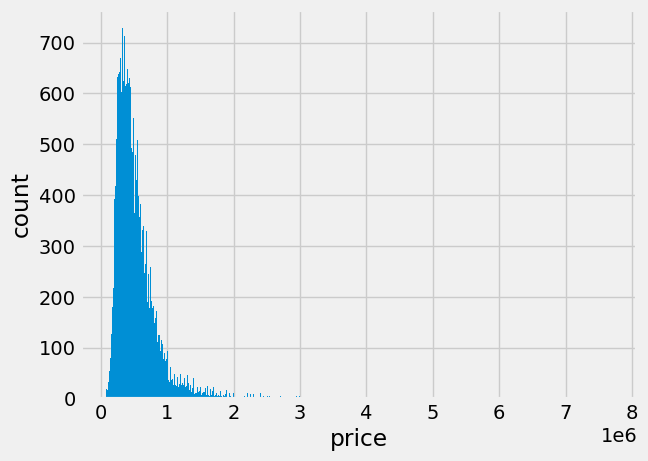

In [15]:
plt.hist(df['price'], bins=500)  # 設置 bins 參數為 50
plt.xlabel('price')
plt.ylabel('count')

#### 清除離群值

In [16]:
def outlier_idx(x):
    q1, q3 = np.percentile(x, [25, 75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return np.where((x < lower_bound) | (x > upper_bound))

idx = outlier_idx(df['price'])[0]

# 清除離群值
df = df.drop(idx)


# 打印清理後的資料
print(df)


               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [ ]:
列出清除離群值後的價格區間

Text(0, 0.5, 'count')

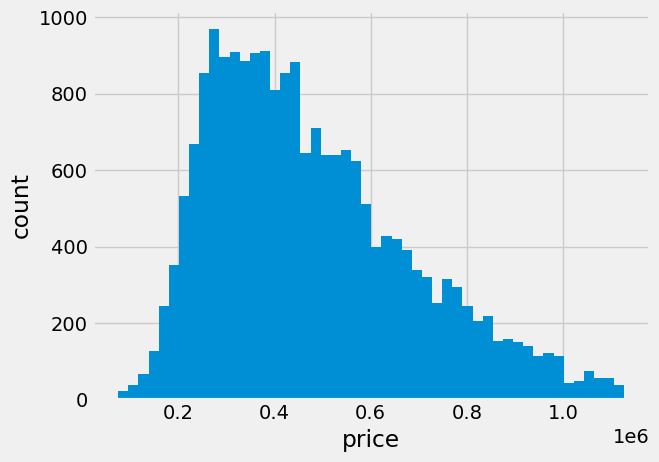

In [8]:
plt.hist(df['price'], bins=50)  # 設置 bins 參數為 50
plt.xlabel('price')
plt.ylabel('count')

## 2.敘述性統計分析
	透過敘述性統計分析，可以來了解樣本的屬性，樣本之敘述統計量包含平均數、中位數、標準差、變異數、最大值/最小值等等，以下為針對price特徵的計算結果:

In [156]:
print('price平均值:',df['price'].mean())
print('price中位數:',df['price'].median())
print('price最大值:',df['price'].max())
print('price最小值:',df['price'].min())
print('price全距:',df['price'].max()-df['price'].min())
print('price變異數:',df['price'].var())
print('price標準差:',df['price'].std())

price平均值: 476984.55943714274
price中位數: 437500.0
price最大值: 1127500.0
price最小值: 75000.0
price全距: 1052500.0
price變異數: 43418582690.06248
price標準差: 208371.26167027562


房價(price)的總平均數為476984，中位數為437500，平均數較中位數高，表示數據分佈右偏(正偏)，即有正態分佈的長尾向右延伸，在房價的情境中，這代表有一部分高價房屋使得平均數被拉高，也就是因為少數的昂貴房屋使得整體房價的平均數偏高。
另外，中位數因為是處於中間位置的值且不受極端值的影響，所以它可以更好地代表數據的集中趨勢。而在這種情況下，中位數較低，顯示了大多數房價集中在較低的區域。

以下我也透過df.describe()來取得其他特徵的相關統計:


In [157]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,2.046700e+04,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,4.603223e+09,4.769846e+05,3.329750,2.051632,1975.558167,1.461041e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.330972,267.227195,1970.811013,74.681145,98078.555773,47.556888,-122.213265,1922.255191,12447.084526
std,2.877364e+09,2.083713e+05,0.912885,0.711906,774.833460,4.010956e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.296461,409.031661,29.160540,378.761647,53.336953,0.141038,0.142412,614.932010,26538.592250
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131701e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.905082e+09,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567000,-122.232000,1800.000000,7542.000000
75%,7.338101e+09,6.000000e+05,4.000000,2.500000,2431.000000,1.031900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9883.500000
max,9.900000e+09,1.127500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


透過price的四分位箱型圖發現price的箱子落在約0.3到0.6之間，表示房價的中間50%數據相對集中在這個範圍內。大多數房價分佈在這個區間內，不是偏向於極高或極低的價格，而圖的右側仍有一些的離群值。

{'whiskers': [<matplotlib.lines.Line2D at 0x2b2a65eb5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b2a65f8650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b2a65eb010>],
 'medians': [<matplotlib.lines.Line2D at 0x2b2a65f98d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b2a65fa0d0>],
 'means': []}

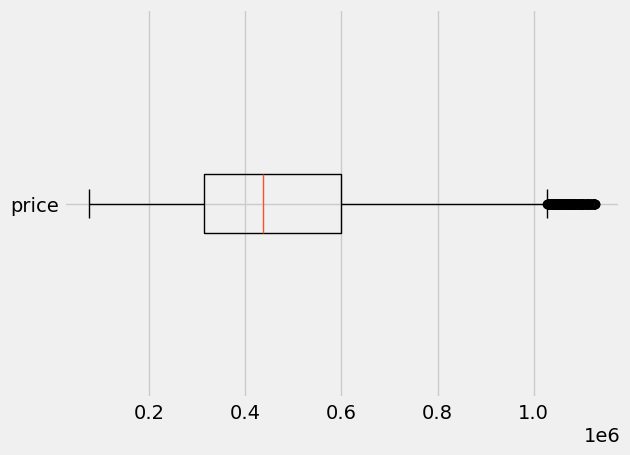

In [158]:
data = df['price'].tolist() # 取得 'price' 列的數據，並轉換為列表格式
plt.boxplot(data, labels=['price'], vert=False) # 繪製相形圖


## 3.特徵相關性分析
### 相關係數熱度圖

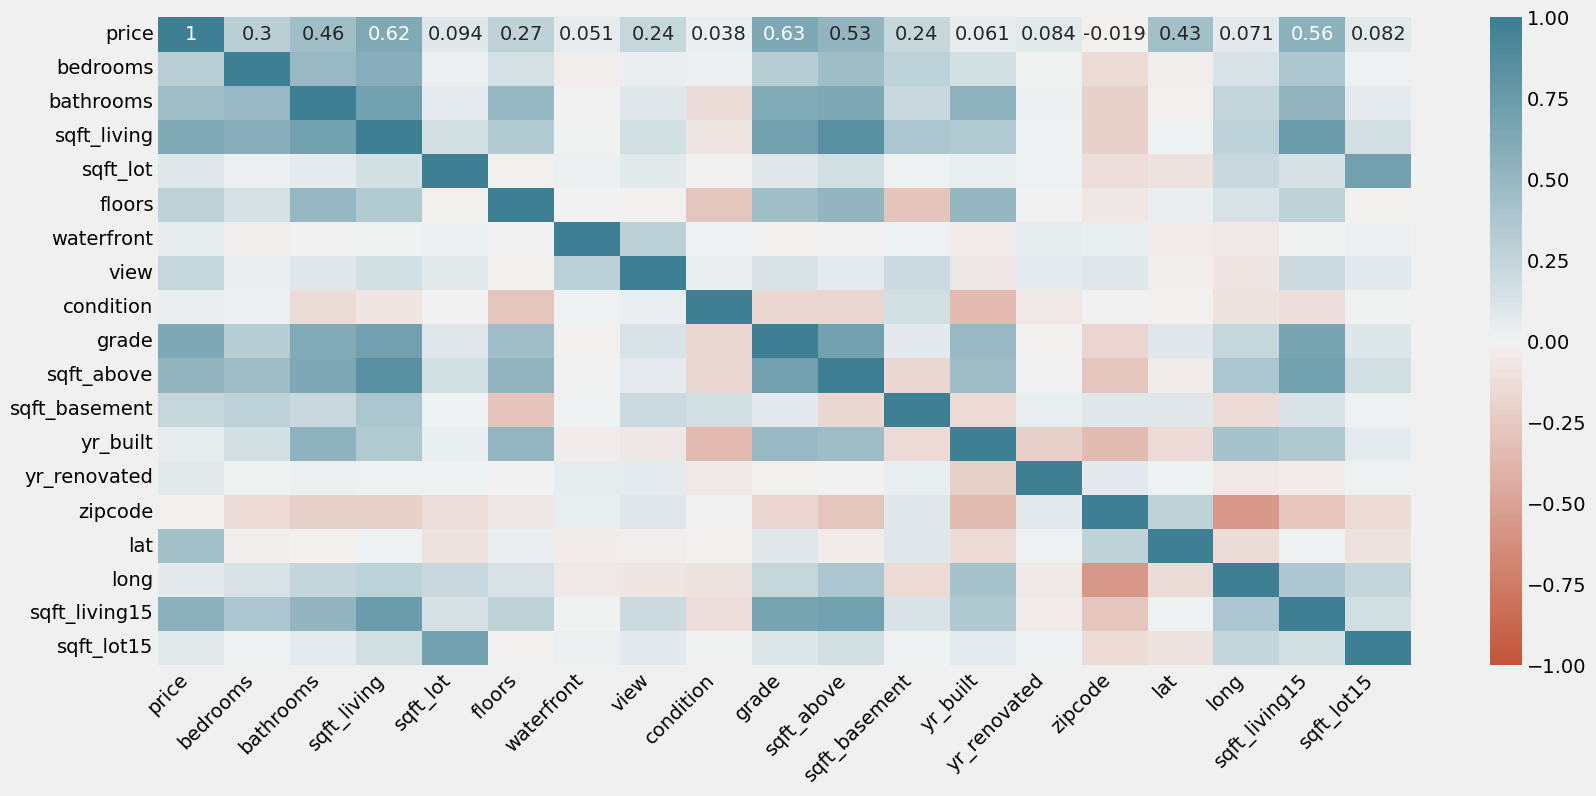

In [160]:
# 計算相關係數矩陣
corr = df.loc[:, 'price':'sqft_lot15'].corr()
ax = plt.subplots(figsize=(18, 8))

# 繪製熱力圖
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False, annot=True
)

# 設置 x 軸刻度標籤旋轉和水平對齊
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# 顯示圖形
plt.show()


透過相關係數熱度圖可以觀察到，和price正相關係數最高的是grade(0.63)，其次是sqft_living (0.62)(房子的面積)，也就是這兩者呈高度的正相關，但因為grade的數值並不連續(為離散、正整數的數值組成)，因此，我將使用相關係數次高的sqft_living用來建立下述的簡單線性回歸線。

在這裡使用sns.pairplot()函式來呈現特徵與特徵間兩兩的相互關係，我去除了id、date等有關編號的特徵，保留了可能對price有影響的13個特徵來比對，其中對角線上為該特徵的分布圖，然後紅線代表特徵和特徵間的回歸線。

<Figure size 2000x1000 with 0 Axes>

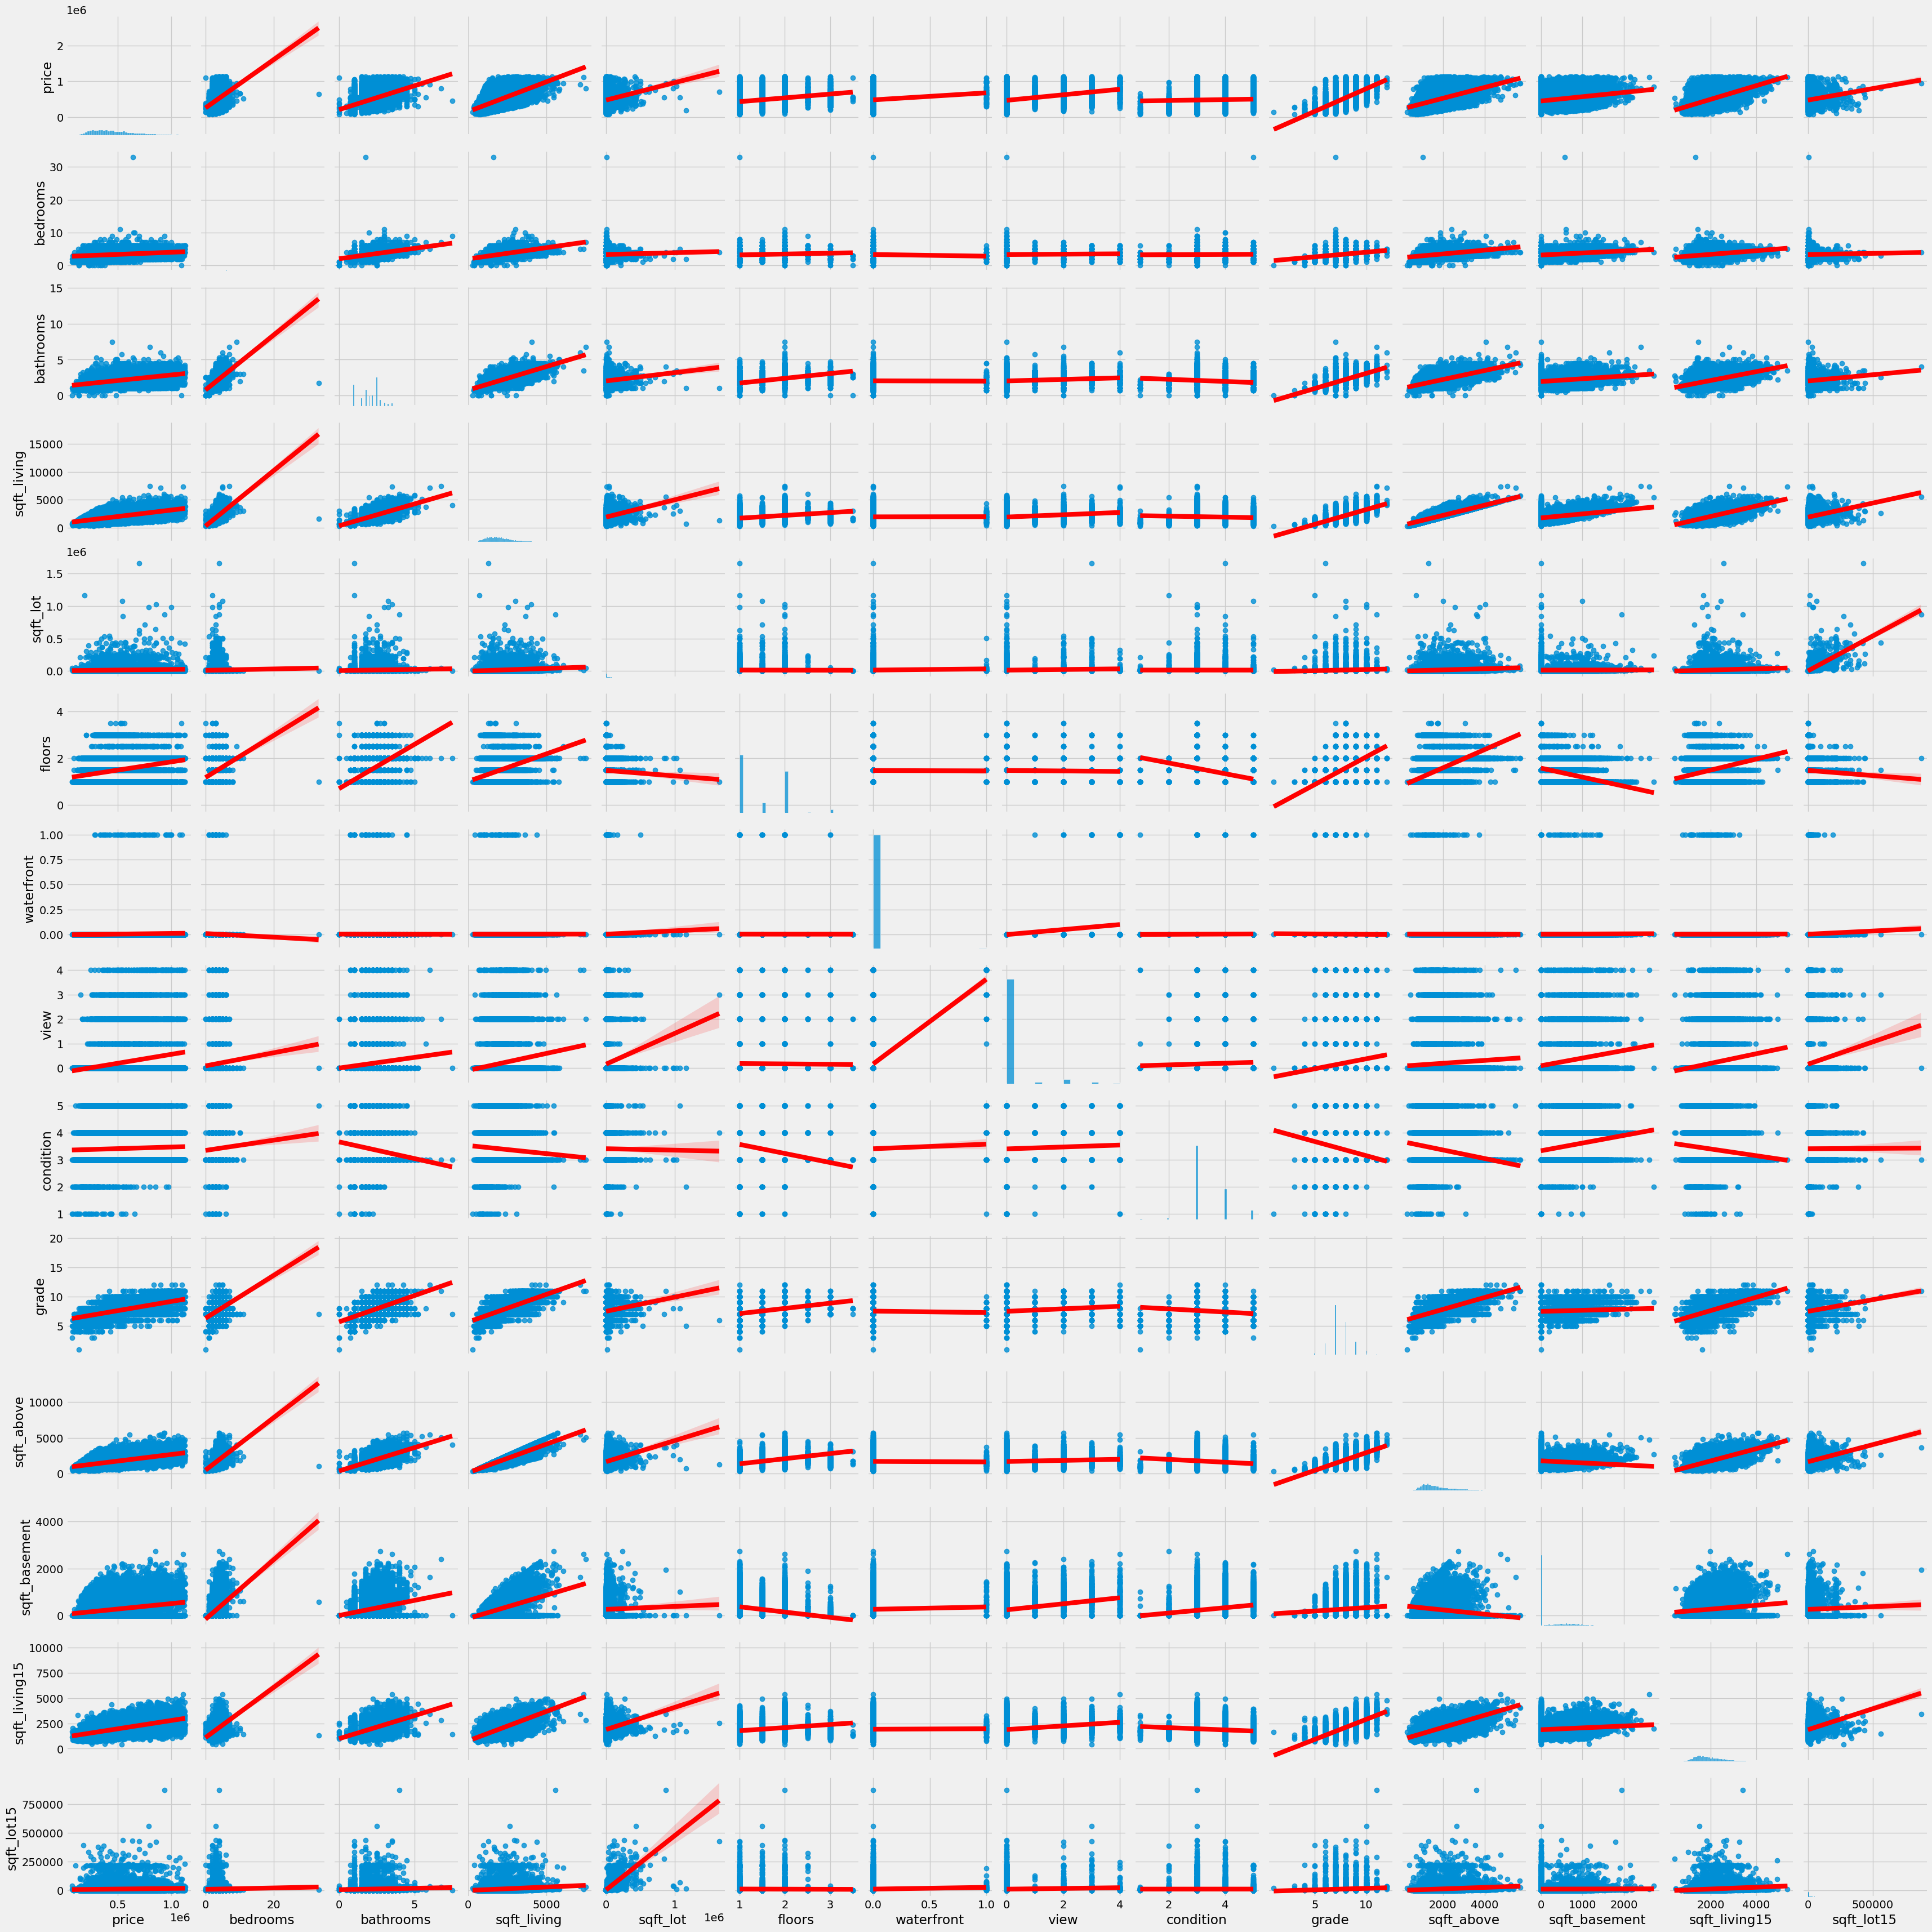

In [161]:
color = 'red'

plt.figure(figsize=(20, 10))

# 使用pairplot繪製迴歸線
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']],
             kind="reg", plot_kws={'line_kws': {'color': color}})

plt.show()

若看第一列的所有圖表(固定price，比對其他特徵向量)，可以發現幾乎每個特徵的回歸線斜率是正的，代表每個特徵對price有一定的影響。

# Part 2
## 4.資料分割與建置回歸模型(線性or非線性)
### 資料分割:
首先將dataset中以80:20(訓練集:測試集)的比例切割，接者使用表格查看數據集(y)、訓練(y_train)與測試集(y_test)的數量。

In [17]:
from sklearn.model_selection import train_test_split

# 將 price 數值劃分為每 50000 一組的區間
df['price_category'] = pd.cut(df['price'], bins=range(0, int(df['price'].max()) + 50000, 50000))

# 將劃分後的區間的中心值作為新的目標變量
df['price_category'] = df['price_category'].apply(lambda x: x.mid)

# 定義特徵和目標變量
X = df.loc[:, 'bedrooms':'sqft_lot15']  # 特徵
y = df['price']  # 目標變量

# 切割訓練集和測試集，並確保每個類別都有足夠的樣本
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建 DataFrame 來顯示分割後的目標變量的分佈
df_count = pd.concat([y.value_counts(), y_train.value_counts(), y_test.value_counts()], axis=1)
df_count.columns = ['y', 'y_train', 'y_test']
df=df.drop(['price_category'],axis=1)
df_count.head()


,y,y_train,y_test
price,,,
450000.0,172,135.0,37.0
350000.0,172,128.0,44.0
550000.0,159,136.0,23.0
500000.0,152,121.0,31.0
425000.0,150,125.0,25.0


### 建立簡單線性回歸模型
在這裡先建立只有一個特徵預測price特徵的簡單線性回歸，在特徵相關性分析中，我選用sqft_living來當作自變量，結果如下:

w_1= [167.36021925] 代表斜率
w_0= [146354.71150074] 代表截距


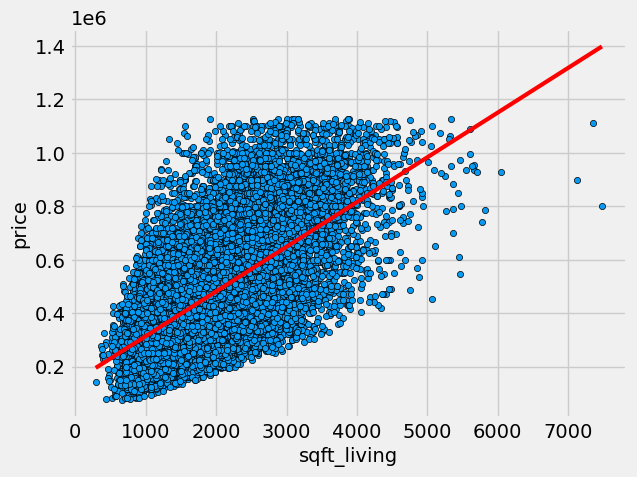

In [18]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')

y,x = df.loc[:,['price']], df.loc[:,['sqft_living']]
lr=LinearRegression()
lr.fit(x,y)
print('w_1=',lr.coef_[0],'代表斜率')
print('w_0=',lr.intercept_,'代表截距')

plt.scatter(x,y,facecolor='xkcd:azure',
            edgecolor='black',s=20)
plt.xlabel('sqft_living',fontsize=14)
plt.ylabel('price',fontsize=14)

n_x=np.linspace(x.min(),x.max(),100)
n_y=lr.intercept_ +lr.coef_[0]*n_x
plt.plot(n_x,n_y,color='r',lw=3)

此迴歸係數中，W1為斜率，W0為截距，在這邊我得到斜率為167.36，即當sqft_living增加一個單位後，price會上漲167.36個單位。

### 建立多元線性回歸模型
#### 建立多元回歸模型
在建立多元線性回歸前，我將和price無關的特徵'id', 'date', 'zipcode'先從dataset中去除，再以scikit-learn庫中LinearRegression()建立多元線性迴歸。

In [20]:
from sklearn.linear_model import LinearRegression

# 去除不需要的特徵
housePrice = df.drop(['id', 'date', 'zipcode', 'price'], axis=1)

X = housePrice

# 目標變量
y = df['price']

# 建立並擬合多元線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)
print('w_0 =', model.intercept_)

w_0 = -5765884.428565984


#### 查看VIF
在建立多元線性回歸前，我將和price無關的特徵'id', 'date', 'zipcode'先從dataset中去除，再以scikit-learn庫中LinearRegression()建立多元線性迴歸。

增加多個自變數後，為了避免「多元共線性」問題，讓某些自變數提高解釋力，進而影響模型造成偏差，我會用變異膨脹因子(VIF)來查看是否共線性較嚴重，課本提到statsmodels套件計算VIF的官方API建議大於5及有共線性存在，但大多數人認為其標準可以放寬到10，以下為執行結果:



In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()
X_vif['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = X_vif.columns
df_vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
df_vif

# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,bedrooms,1.658494
1,bathrooms,3.032585
2,sqft_living,inf
3,sqft_lot,2.048684
4,floors,2.064624
5,waterfront,1.106829
6,view,1.225070
7,condition,1.225739
8,grade,2.833884
9,sqft_above,inf


從上面可以觀察到sqft_living、sqft_above、sqft_basement這三個特徵的VIF非常大，存在嚴重的共線性，因此我選擇將三個特徵依序從dataset中移除，在執行一次VIF後結果如下:

In [22]:
from sklearn.linear_model import LinearRegression

# 去除不需要的特徵
housePrice2 = housePrice.drop(['sqft_above'], axis=1)

X = housePrice2

# 目標變量
y = df['price']

# 建立並擬合多元線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)
print('w_0 =', model.intercept_)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()
X_vif['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = X_vif.columns
df_vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
df_vif

# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

w_0 = -5765884.428565984


,feature,VIF
0,bedrooms,1.658494
1,bathrooms,3.032585
2,sqft_living,5.301610
3,sqft_lot,2.048684
4,floors,2.064624
5,waterfront,1.106829
6,view,1.225070
7,condition,1.225739
8,grade,2.833884
9,sqft_basement,1.933015


In [28]:
from sklearn.linear_model import LinearRegression

# 去除不需要的特徵
housePrice2 = housePrice.drop(['sqft_living'], axis=1)

X = housePrice2

# 目標變量
y = df['price']

# 建立並擬合多元線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)
print('w_0 =', model.intercept_)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()
X_vif['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = X_vif.columns
df_vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
df_vif

# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

w_0 = -5765884.428565984


,feature,VIF
0,bedrooms,1.658494
1,bathrooms,3.032585
2,sqft_lot,2.048684
3,floors,2.064624
4,waterfront,1.106829
5,view,1.225070
6,condition,1.225739
7,grade,2.833884
8,sqft_above,4.671044
9,sqft_basement,1.985845


In [27]:
from sklearn.linear_model import LinearRegression

# 去除不需要的特徵
housePrice2 = housePrice.drop(['sqft_basement'], axis=1)

X = housePrice2

# 目標變量
y = df['price']

# 建立並擬合多元線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)
print('w_0 =', model.intercept_)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()
X_vif['constant'] = 1
df_vif = pd.DataFrame()
df_vif['feature'] = X_vif.columns
df_vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
df_vif

# 移除新增的行
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

w_0 = -5765884.428565984


,feature,VIF
0,bedrooms,1.658494
1,bathrooms,3.032585
2,sqft_living,7.126040
3,sqft_lot,2.048684
4,floors,2.064624
5,waterfront,1.106829
6,view,1.225070
7,condition,1.225739
8,grade,2.833884
9,sqft_above,6.111451


最後可發現刪除sqft_living後整體VIF表現較優
因此我決定刪除sqft_living

#### 修正多元回歸模型
再刪除具有共線性的特徵後可觀察到剩餘的特徵皆具有較低的VIF值，表示其互相獨立，因而可以使用這些特徵建立新的多元回歸模型

In [29]:
import statsmodels.api as sm

X = sm.add_constant(X)  # 增加常數行作為截距項
model1 = sm.OLS(y, X)
result = model1.fit()
print('迴歸係數：', result.params)
result.summary() #使用statsmodels套件進行迴歸分析

迴歸係數： const           -2.392993e+07
bedrooms        -8.509782e+03
bathrooms        2.365069e+04
sqft_lot         2.370473e-01
floors           3.144277e+04
waterfront       1.191609e+05
view             2.916725e+04
condition        2.857045e+04
grade            7.235761e+04
sqft_above       7.113744e+01
sqft_basement    7.015950e+01
yr_built        -1.723208e+03
yr_renovated     1.458706e+01
lat              5.312530e+05
long            -1.295881e+04
sqft_living15    5.060736e+01
sqft_lot15      -1.414289e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2909.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        10:01:41   Log-Likelihood:            -2.6756e+05
No. Observations:               20467   AIC:                         5.351e+05
Df Residuals:                   20450   BIC:                         5.353e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.393e+07   9.26e+05    -25.843      0.000   -2.57e+07   -2.21e+07
bedrooms      -8509.7821   1135.634     -7.493      0.000   -1.07e+04   -6283.848
bathrooms      2.365e+04   1969.161     12.011      0.000    1.98e+04    2.75e+04
sqft_lot          0.2370      0.029      8.252      0.000       0.181       0.293
floors         3.144e+04   2153.856     14.598      0.000    2.72e+04    3.57e+04
waterfront     1.192e+05   1.55e+04      7.670      0.000    8.87e+04     1.5e+05
view           2.917e+04   1390.124     20.982      0.000    2.64e+04    3.19e+04
condition      2.857e+04   1377.016     20.748      0.000    2.59e+04    3.13e+04
grade          7.236e+04   1304.046     55.487      0.000    6.98e+04    7.49e+04
sqft_above       71.1374      2.392     29.738      0.000      66.449      75.826
sqft_basement    70.1595      2.773     25.297      0.000      64.723      75.596
yr_built      -1723.2080     43.492    -39.621      0.000   -1808.457   -1637.960
yr_renovated     14.5871      2.262      6.448      0.000      10.153      19.022
lat            5.313e+05   6058.752     87.684      0.000    5.19e+05    5.43e+05
long          -1.296e+04   6952.600     -1.864      0.062   -2.66e+04     668.844
sqft_living15    50.6074      2.190     23.105      0.000      46.314      54.900
sqft_lot15       -0.1414      0.044     -3.227      0.001      -0.227      -0.056
==============================================================================
Omnibus:                     1808.517   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3343.211
Skew:                           0.616   Prob(JB):                         0.00
Kurtosis:                       4.550   Cond. No.                     5.63e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

由上表可以知道R-square為0.695，依照課本所述在合理範圍。另外"Prob (F-statistic)" 的值為0.00，這意味著在零假設下觀察到給定的F統計量（2909）或更極端情況的概率非常低。

## 5.模型效能評估
在這裡我利用了MSE(均方誤差)及決定係數(coefficient of determination)R^2來評估模型效能
### 簡單線性回歸模型

In [32]:
from sklearn.metrics import mean_squared_error, r2_score


# 預測目標值
y_pred = lr.predict(x)

# 計算MSE
mse = mean_squared_error(y, y_pred)

# 計算R平方
r2 = r2_score(y, y_pred)

print("簡單線性回歸之 MSE:", mse)
print("簡單線性回歸之 R^2:", r2)

簡單線性回歸之 MSE: 26601340694.466133
簡單線性回歸之 R^2: 0.3872982757987036


### 多元線性回歸模型

In [33]:
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('多元線性回歸之 MSE(training): %.3f, MSE(testing): %.3f' %( 
    mean_squared_error(y_train, y_train_pred), 
    mean_squared_error(y_test, y_test_pred)))

print('多元線性回歸之 R^2(training): %.3f, R^2(testing): %.3f' %( 
    r2_score(y_train, y_train_pred), 
    r2_score(y_test, y_test_pred)))

多元線性回歸之 MSE(training): 13198814735.022, MSE(testing): 13043334394.763
多元線性回歸之 R^2(training): 0.699, R^2(testing): 0.687


在多元線性回歸中，因為MSE衡量了模型預測值與實際值之間的平均誤差的平方且可能數值較大，所以MSE較大。但和簡單線性迴歸模型相比，MSE明顯減少了許多，在R^2中也驗證了課本所提到的增加自變數，能夠大幅提升R^2值，另外模型在訓練集和測試集上的性能相對接近，沒有出現明顯的過擬合或欠擬合現象。

## 6.預測結果分析
### 實際值與預測值的散點圖
下圖中以x軸當作price實際值，y軸當作price預測值，來觀察兩者之間的關係。紅色線表示通過線性回歸模型擬合的回歸線，代表實際價格與模型預測價格之間的線性關係。

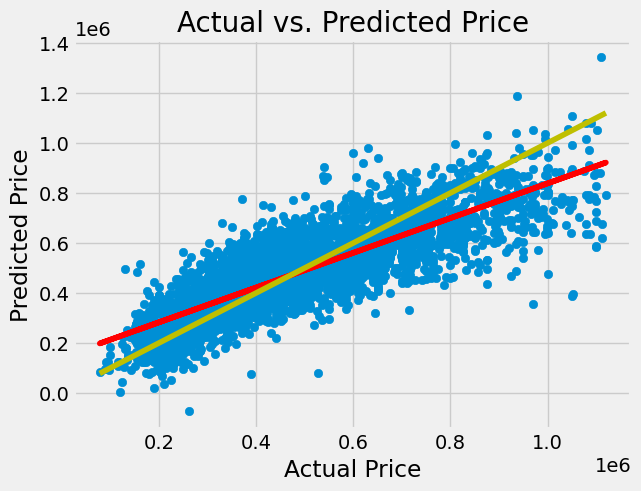

coefs[0](斜率): 0.695


In [35]:
y_predict = model.predict(X_test)

y_test_1d = np.ravel(y_test)
coefs = np.polyfit(y_test_1d, y_predict, 1)

plt.scatter(y_test, y_predict)

plt.plot(y_test, coefs[0]*y_test + coefs[1], color='red') #繪製迴歸線
plt.title("Actual vs. Predicted Price", fontsize = 20)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'y')#繪製對角線
plt.grid(True)
plt.show()

print('coefs[0](斜率): %.3f' %(coefs[0]))




#### 常態性檢定
因為樣本數較多，我採用Kolmogorov-Smirnov常態性檢定來檢查殘差值是否呈現常態分佈:


In [36]:
import statsmodels.api as sm
from scipy.stats import kstest


X = sm.add_constant(X)  # 增加常數行作為截距項
model = sm.OLS(y, X).fit()

# Kolmogorov-Smirnov 常態性檢定
stat, p = kstest(model.resid, 'norm')
print('Statistics: %.3f, p-value: %.3f' % (stat, p))
alpha = 0.05

if p > alpha:
    print('是常態分布（無法拒絕H0）')
else:
    print('非常態分布（拒絕H0）')

Statistics: 0.532, p-value: 0.000
非常態分布（拒絕H0）


#### QQ圖
使用 qqplot 函數來繪製殘差的 QQ 圖，用來檢查一個樣本是否符合常態分佈，其中藍色的點表示觀測值的分位數，紅色的直線表示理論分佈（在這裡是常態分佈）。


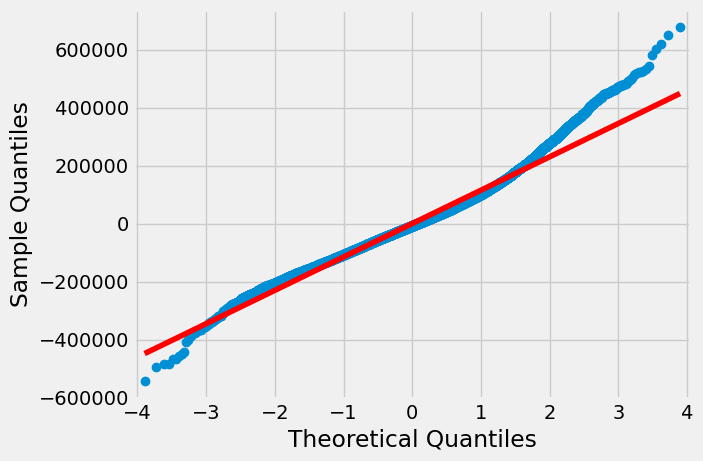

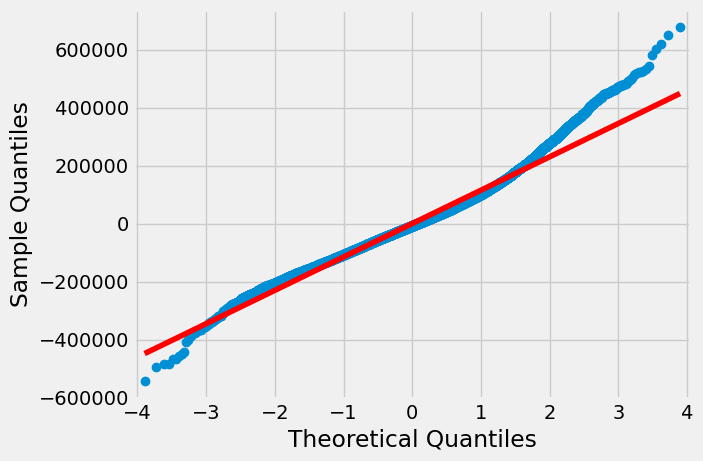

In [37]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='s')

由圖可以發現，theoretical Quantiles中約 -3至1.5的範圍間其藍色的點和紅色線非常接近，代表這段區間這些觀測值的數值與常態分佈的期望值和變異數十分相符。然而超出-3至1.5的範圍時，可以看到明顯的偏差。這表示在這些區域內，觀測值的分佈與常態分佈有所偏離，可能存在一些異常值或系統性的偏差。這代表模型可能在處理極端值或在這些區域內的預測能力較差。

#### 檢查獨立性
使用Durbin-Watson統計量DW來檢驗自相關性，檢視是否殘差間相互獨立，以避免在估計迴歸係數時降低檢定立，結果如下:


In [38]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print('dw: %.3f' % dw)

dw: 1.973


在課本中提到dw的合法範圍須在0-4之間，而此迴歸模型的dw為1.973，符合課本提到的接近2表示具有獨立性。

#### 繪製殘差圖
這裡使用殘差圖，可以觀察模型的殘差與預測值之間的關係，紅色線為估計值，是利用局部加權散點平滑法對殘差繪製而成，即標準化後的預測值和殘差進行擬合。在結果中顯示X軸在約-1.5之後，紅色線十分接近0的水平線，代表了殘差變異數符合同質性，預測值為較精準，而在-1.5左側紅色線偏離了水平線，可能導致模型在低預測值範圍內較為不準。


Text(0, 0.5, 'Residual (standardization)')

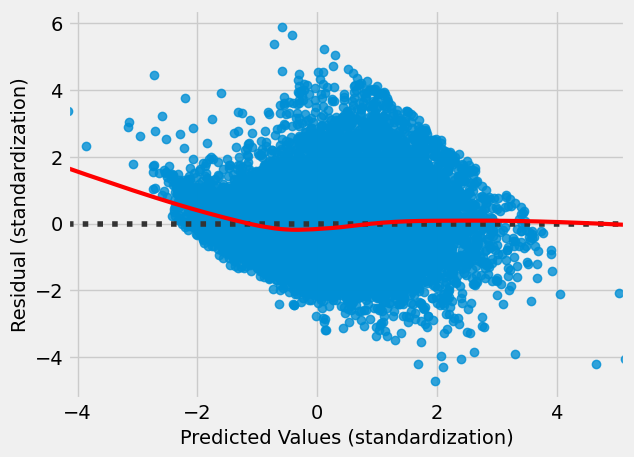

In [39]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df_resid = pd.DataFrame()
df_resid['y_pred'] = model.predict(X)
df_resid['resid'] = model.resid
df_resid = StandardScaler().fit_transform(df_resid)

kws = {'color':'red', 'lw':3}
sns.residplot(x=df_resid[:, 0], y=df_resid[:, 1], 
              lowess=True, line_kws=kws)
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)

# Part III:
## 7.非線性迴歸模型 or 特徵變數變換
### 簡單非線性回歸模型:
以下對sqft_living(自變數)和price(應變數)做degree為1到3的迴歸模型製作結果:


In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


sqft_living, price = df[['sqft_living']].values, df['price'].values
sqft_living[:3, :]

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

def adj_r2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

r2_lst, mse_lst, y_plot_lst = [None], [None], [None]
# 產生繪圖的 x 座標
x_plot = np.linspace(sqft_living.min(), sqft_living.max(), 100).reshape(-1,1)

def reg_r2_mse(sqft_living, price, deg):
    # 產生 deg 次多項式特徵
    pol_d = PolynomialFeatures(degree=deg)
    sqft_living = pol_d.fit_transform(sqft_living)
    
    lr = LinearRegression()
    lr = lr.fit(sqft_living, price)
    price_pred = lr.predict(sqft_living)
    r2_lst.append(adj_r2(r2_score(price, price_pred), sqft_living.shape[0], 1))
    y_plot_lst.append(lr.predict(pol_d.fit_transform(x_plot)))

reg_r2_mse(sqft_living, price, 1)
reg_r2_mse(sqft_living, price, 2)
reg_r2_mse(sqft_living, price, 3)

r2_lst  



[None, 0.3872683367943449, 0.38735815914297567, 0.3903697783709037]

In [206]:
def reg_r2_mse(sqft_living, price, deg):
    # 產生 deg 次多項式特徵
    pol_d = PolynomialFeatures(degree=deg)
    sqft_living = pol_d.fit_transform(sqft_living)
    
    lr = LinearRegression()
    lr = lr.fit(sqft_living, price)
    price_pred = lr.predict(sqft_living)
    r2_lst.append(adj_r2(r2_score(price, price_pred), sqft_living.shape[0], 1))
    mse_lst.append(mean_squared_error(price, price_pred))
    y_plot_lst.append(lr.predict(pol_d.fit_transform(x_plot)))

reg_r2_mse(sqft_living, price, 1)
reg_r2_mse(sqft_living, price, 2)
reg_r2_mse(sqft_living, price, 3)

mse_lst  # 三個迴歸模型的 MSE

[None, 26601340694.466133, 26597441116.49198, 26466693655.678562]

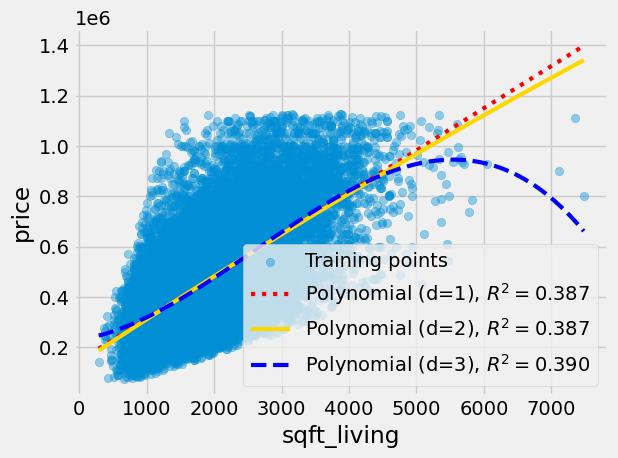

In [207]:
plt.scatter(sqft_living, price, label='Training points', alpha=.4)

plt.plot(x_plot, y_plot_lst[1], 
         color='red', lw=3, linestyle=':', 
         label='Polynomial (d=1), $R^2=%.3f$' % r2_lst[1])

plt.plot(x_plot, y_plot_lst[2],
         color='gold', lw=3, linestyle='-',
         label='Polynomial (d=2), $R^2=%.3f$' % r2_lst[2])

plt.plot(x_plot, y_plot_lst[3],
         color='blue', lw=3, linestyle='--',
         label='Polynomial (d=3), $R^2=%.3f$' % r2_lst[3])

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(loc='lower right')
plt.tight_layout()

圖表右下角的R^2三個數值分別為degree 1到3迴歸模型的 Adj. R，在本次實做中，這三個並無明顯的變化，而在deg為3的時候可看出右側受到一點離群值影響，讓迴歸線轉彎的幅度比較大。

### 多元非線性回歸模型:

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
poly_reg.fit(X_train, y_train)

y_pred_poly = poly_reg.predict(X_test)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)  # 計算 MSE

print(f'多項式多元迴歸 (deg=1) 之 R^2: {poly_r2}')
print(f'多項式多元迴歸 (deg=1) 之 MSE: {poly_mse}') 

多項式多元迴歸 (deg=1) 之 R^2: 0.6867899638843826
多項式多元迴歸 (deg=1) 之 MSE: 13043334394.76258


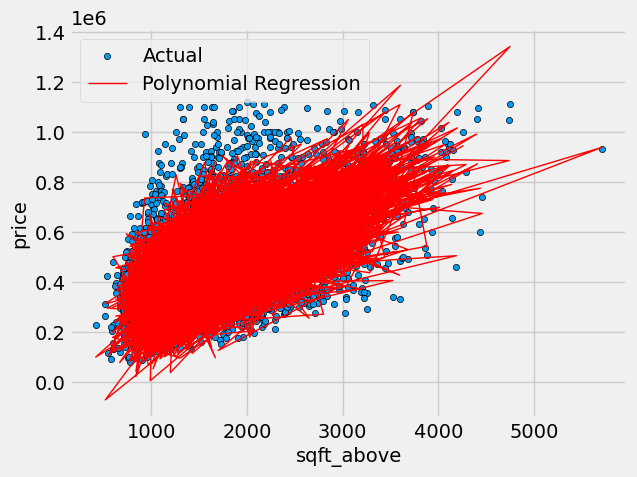

In [41]:
plt.scatter(X_test['sqft_above'], y_test, facecolor='xkcd:azure', edgecolor='black', s=20, label='Actual')
plt.plot(X_test['sqft_above'], y_pred_poly, color='r', lw=1, label='Polynomial Regression')

plt.xlabel('sqft_above', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend()
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

y_pred_poly = poly_reg.predict(X_test)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)  # 計算 MSE

print(f'多項式多元迴歸 (deg=2) 之 R^2: {poly_r2}')
print(f'多項式多元迴歸 (deg=2) 之 MSE: {poly_mse}') 

多項式多元迴歸 (deg=2) 之 R^2: 0.7487583519635925
多項式多元迴歸 (deg=2) 之 MSE: 10462719745.099215


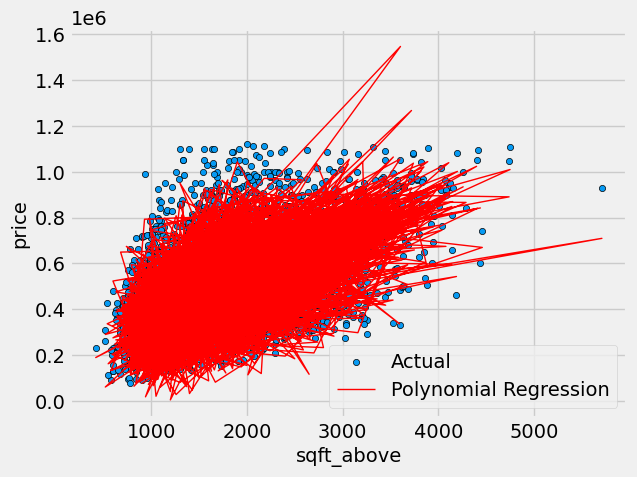

In [43]:
plt.scatter(X_test['sqft_above'], y_test, facecolor='xkcd:azure', edgecolor='black', s=20, label='Actual')
plt.plot(X_test['sqft_above'], y_pred_poly, color='r', lw=1, label='Polynomial Regression')

plt.xlabel('sqft_above', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend()
plt.show()

在degree為2的非線性多元迴歸模型中，R^2和MSE相較線性的都有上升，另外，我使用測試數據X_test['sqft_above'] 作為x軸，實際目標變量price作為散點圖上的點，並使用多項式多元迴歸模型的預測結果y_pred_poly作為迴歸曲線。

圖中的藍色點代表實際的價格值，而紅色的曲線則代表使用多項式多元迴歸模型對價格進行的預測。

觀察兩者圖發現，deg=2的紅線涵蓋藍色的點相較deg=1的多，代表deg=2的模型預測來的比deg=1理想。



In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 使用 degree=3 創建多項式迴歸模型
poly_reg_degree_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_reg_degree_3.fit(X_train, y_train)

# 預測
y_pred_poly_degree_3 = poly_reg_degree_3.predict(X_test)

# 計算 R^2 和 MSE
poly_r2_degree_3 = r2_score(y_test, y_pred_poly_degree_3)
poly_mse_degree_3 = mean_squared_error(y_test, y_pred_poly_degree_3)

print(f'多項式多元迴歸 (deg=3) 之 R^2: {poly_r2_degree_3}')
print(f'多項式多元迴歸 (deg=3) 之 MSE: {poly_mse_degree_3}')


多項式多元迴歸 (deg=3) 之 R^2: -0.14059144760308473
多項式多元迴歸 (deg=3) 之 MSE: 47498847238.093185


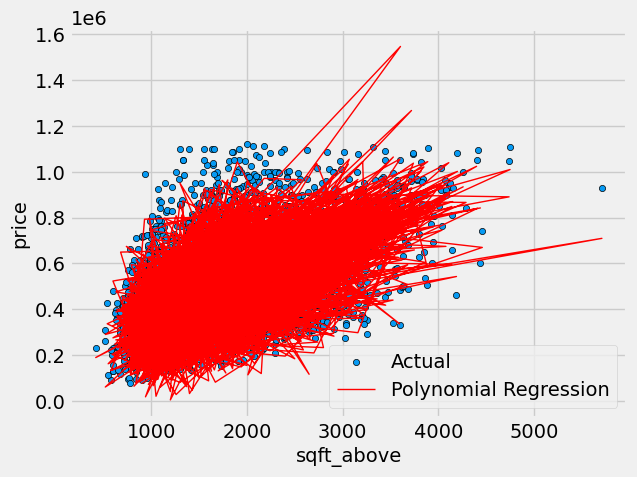

In [51]:
plt.scatter(X_test['sqft_above'], y_test, facecolor='xkcd:azure', edgecolor='black', s=20, label='Actual')
plt.plot(X_test['sqft_above'], y_pred_poly, color='r', lw=1, label='Polynomial Regression')

plt.xlabel('sqft_above', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend()
plt.show()

## 8.迴歸模型之正規化
下面針對多元線性迴歸模型進行標準化的實作:### )	資料正規化
這裡將使用fit_transform方法對特徵矩陣(X)和目標變量(y)進行標準化處理，將特徵縮放到平均值為0，標準差為1的標準正態分佈。確保不同特徵之間的數值範圍相似，檢視以下輸出的正規化後特徵矩陣(X_std)，來確保特徵值已經被正確縮放:


In [44]:
from sklearn.preprocessing import StandardScaler

# 進行標準化

scalar = StandardScaler()
X_std = scalar.fit_transform(X)
y_2d = y.values.reshape(-1, 1)
y_std = scalar.fit_transform(y_2d)

X_std[:1, :]

array([[ 0.        , -0.36122676, -1.47724228, -0.22340379, -0.88643684,
        -0.05467465, -0.26940057, -0.62786432, -0.51056442, -0.72644913,
        -0.65333261, -0.54221901, -0.19717669, -0.32394872, -0.30710573,
        -0.94688422, -0.25612702]])

## 	接者使用Ridge回歸模型和交叉驗證(Cross-Validation)來選擇最佳的正則化參數alpha值:

In [45]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
plt.style.use('fivethirtyeight')

# 利用交叉驗證找出最佳 alpha
alphas = np.logspace(-3, 3, 50)
reg_cv = RidgeCV(alphas, store_cv_values=True)
reg_cv.fit(X_std, y_std)
print('Best alpha: %.3f' % reg_cv.alpha_)

Best alpha: 44.984


此次實作得到了較高的alpha值，意味著增加正規化的強度，進而限制模型參數的大小，防止過度擬合（overfitting）。

(0.001, 1000.0)

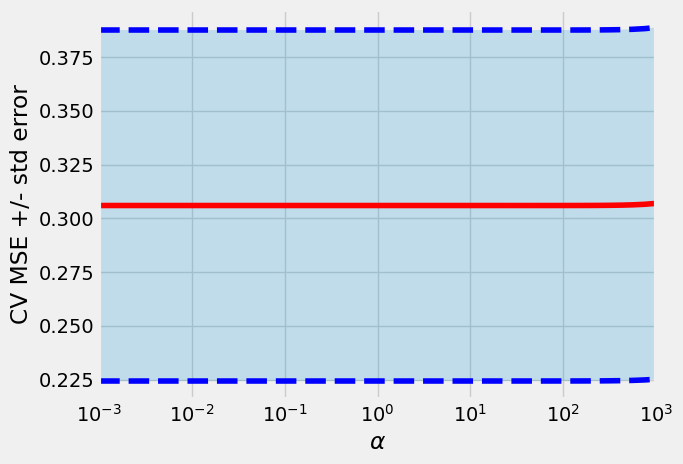

In [46]:
scores = np.mean(reg_cv.cv_values_, axis=0)[0]
scores_std = np.std(reg_cv.cv_values_, axis=0)[0]

# 設定 x 軸為對數
plt.semilogx(alphas, scores, color='red')

# 繪製 MSE +/- 標準誤

std_error = scores_std / np.sqrt(len(scores))
plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'b--')

plt.fill_between(alphas, scores+std_error, 
                 scores-std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$')
plt.xlim([alphas[0], alphas[-1]])

In [47]:
# 因為已經標準化，所以把截距拿掉
model_ridge = Ridge(alpha=reg_cv.alpha_,
              fit_intercept=False)
model_ridge.fit(X_std, y_std)
df_coef = pd.DataFrame(data=model_ridge.coef_, 
                       columns=X.columns[:17])
df_coef

,const,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.0,-0.036622,0.080941,0.045472,0.080872,0.031091,0.089737,0.088712,0.359699,0.247165,0.137155,-0.239886,0.026746,0.359068,-0.009198,0.150061,-0.017736


### 結果:

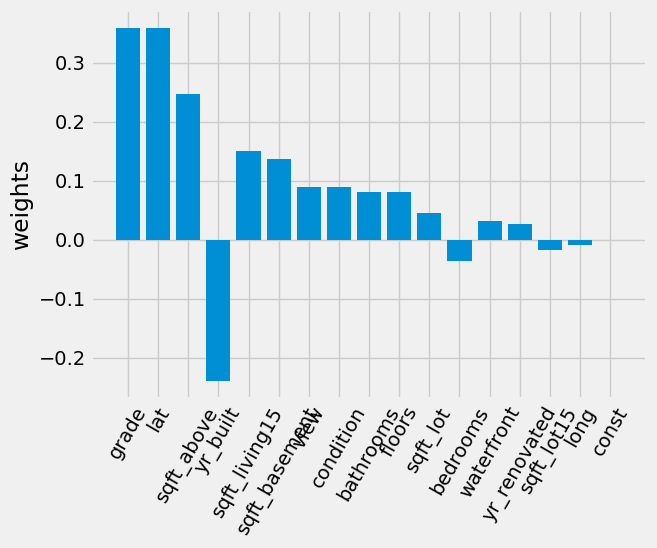

In [48]:
coef = np.array(df_coef)[0]
# 依迴歸係數的絕對值排序(由大到小)
coef_abs = np.apply_along_axis(abs, 0, coef)
idx = np.argsort(-coef_abs)

plt.bar(range(len(coef)), coef[idx])
plt.xticks(range(len(coef)), df_coef.columns[idx], 
           rotation=60)
plt.ylabel('weights');

In [49]:
# 使用訓練好的Ridge模型進行預測
y_pred_std = model_ridge.predict(X_std)

# 將預測結果轉換回原始尺度
y_pred = scalar.inverse_transform(y_pred_std)

# 計算MSE
mse = mean_squared_error(y, y_pred)
print('Ridge回歸模型之MSE:', mse)

# 將實際目標變量轉換回原始尺度
y_true = scalar.inverse_transform(y_std)

# 計算R^2
r2 = r2_score(y_true, y_pred)
print('Ridge回歸模型之R^2:', r2)

Ridge回歸模型之MSE: 13251671402.461914
Ridge回歸模型之R^2: 0.6947777177814769


## 9. 相關模型結果比較分析

以下我使用表格來呈現上述非線性回歸模型的 MSE 和 R^2 數值：

### 簡單迴歸模型

| 模型   |        MSE        |   R^2   |
|--------|------------------|---------|
| deg = 1 | 26601340694.466 |   0.87  |
| deg = 2 | 26597441116.492 |   0.387 |
| deg = 3 | 26466693655.679 |   0.390 |

### 多元迴歸模型

| 模型   |        MSE        |   R^2   |
|--------|------------------|---------|
| deg = 1 | 13409899428.397 |   0.692 |
| deg = 2 | 11509532227.221 |   0.736 |
| deg = 3 | 47498847238.093 |  -0.141 |

### Ridge 回歸模型 (多元線性迴歸模型之正規化)

| 模型   |        MSE        |   R^2   |
|--------|------------------|---------|
| deg = 1 | 13251671402.462 |   0.695 |

上述 6 個模型進行比較後，對於簡變化並不會過多影響達到 2 或 3 可以得到更好的預測表現。然而，多元迴歸易受到 degree 變化的影響，簡單迴歸更能大幅提升效能。這代表以單一個特徵當影響因素不足以讓模型順利預測 price 值。然而，在多元迴歸中，我嘗試使用 deg = 3 建置多元迴歸，發現 MSE 和 R^2 指標效能會大幅下降，因此也不能一昧地提高 degree 數，需要挑選剛好的 degree 才能符合預期。
